# Influencia de multiples factores en el rendimiento en enseñanza media.


Durante los últimos años se ha notado un problema en el desempeño de los estudiantes, especialmente en contexto de pandemia, que ha traido consigo muchos aspectos negativos y han impactado significativamente las vidas de la población. Un estudio de Mineduc y el Banco de Chile publicado en agosto del año 2020* señala que debido al estado del país durante este período es probable un retroceso de 1,3 años en la escolaridad según aprendizaje de los estudiantes, lo que significa una pérdida importante tanto para establecimientos escolares como para universidades. Estando experimentando esta problemática directamente, fue considerado relevante estudiar las posibles variables que estarían influyendo en el aspecto académico del país, haciendo un énfasis en los bienes por región.

Para lo anterior, a partir de la base de datos de Mineduc y su información respecto al desempeño estudiantil, se analizarán y compararán las relaciones que esto tiene con los ingresos económicos regionales y la cantidad de redes a internet fijas, debido a la relevancia que ambas cosas han adquirido en nuestro contexto. De esa forma, se dará respuesta a las siguientes preguntas:

* ¿Cuáles son las regiones que presentan mayor desempeño académico y cuáles son las diferencias con las que tienen peor rendimiento? ¿Coincide lo anterior con el ingreso que estas presentan?
* ¿Se puede decir que hay una relación lineal entre ambas variables?
* ¿Se puede afirmar que el acceso a internet y los ingresos económicos influyen en los estudiantes?
* ¿Existe alguna conexión además entre el acceso a internet y los ingresos económicos?
* ¿Se puede predecir el desempeño del próximo año a partir de lo observado? Y si es así, ¿cómo sería?


*https://www.mineduc.cl/impacto-del-covid-19-en-los-resultados-de-aprendizaje-en-chile/

Los datos a utilizar provienen de bases públicas, y tienen distintas características:

El primero es un archivo .xlsx que se encuentra en la página web de Mineduc, y contiene información de todo tipo del desempeño estudiantil, incluyendo el promedio general anual, la comuna y región de cada estudiante. La mayoría de sus datos son de tipo numérico, incluso los que no tienen un valor específico y en su lugar lo utilizan como representación.

El segundo es un archivo de formato .csv de la Subsecrretaría de Comunicaciones que tiene información respecto a las redes de internet fijas en los hogares, clasificadas por año y región. Los elementos son de tipo numérico y es de corta extensión.

Por último, el tercer grupo de datos corresponde a un archivo .xlsx de la encuesta Casen que contiene información sobre el ingreso promedio de los hogares por región, con 7 años registrados a partir del 2006. Al ser ingresos monetarios, al igual que los datos anteriores, estos también son de tipo numérico.

## Importación de librerías:

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #, cross_val_score

## Limpieza de datos

### Ingresos de los hogares por región

#### Eliminación y cambio de nombre de columnas

In [9]:
excel = pd.read_excel('Propuesta/Ingreso_Casen_en_Pandemia_2020.xlsx', '3')
excel[0:10]

,Indice,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ingreso promedio de los hogares por tipo de in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ingreso promedio de los hogares por tipo de in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2006-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,($ noviembre de cada año),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,($ noviembre 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,2006.000,2009.000,2011.000000,2013.000,2015.000000,2017.000000,2020.000000,...,NaN,NaN,NaN,2006.000000,2009.000000,2011.000000,2013.000000,2.015000e+03,2017.000000,2020.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ingreso del trabajo1,Arica y Parinacota,Estimación,273937.030,464614.310,445949.369744,498799.330,601417.500539,584868.126943,579584.746802,...,Ingreso del trabajo1,Arica y Parinacota,Estimación,436655.625820,647672.348140,583301.775626,623997.961830,6.850145e+05,635166.785861,579584.746802
8,NaN,NaN,Error estándar,14485.616,33157.672,20604.240000,22119.469,43926.100000,27448.392941,22516.422055,...,NaN,NaN,Error estándar,23090.071904,46221.794768,26950.345920,27671.455719,5.003183e+04,29808.954734,22516.422055
9,NaN,Tarapacá,Estimación,356800.090,419526.510,551249.862372,761909.670,889361.285183,773927.612752,790225.530855,...,NaN,Tarapacá,Estimación,568739.343460,584819.954940,721034.819982,953148.997170,1.012983e+06,840485.387449,790225.530855


In [10]:
# Debido a que el dataframe comienza bajo las primeras filas,
# se renombran los índices y se eliminan los espacios sin información.

names = []
for a in excel.keys():
    names.append(str(excel[a][5])[0:4])

dicti = {}
cont = 0
for a in excel.keys():
    if cont == 0 or cont == 1:
        dicti[a] = ''
    else:
        dicti[a] = names[cont]
    cont += 1
excel = excel.rename(dicti, axis = 'columns')

In [11]:
excel.columns.duplicated()

array([False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [12]:
excel_3 = excel
excel_3 = excel_3.iloc[:,~excel_3.columns.duplicated(keep = 'last')]

In [13]:
excel_3 = excel_3.drop(excel_3.index[[0, 1, 2, 3, 4, 5, 6]])

In [14]:
datadata = excel_3[0:138]
datadata=datadata.reset_index()
datadata = datadata.drop('index', axis = 'columns')


In [15]:
# Se eliminan datos nulos.
datadata = datadata.drop('nan', axis = 'columns')
cont = 0
for item in datadata[''].isna():
    if item == True:
        datadata = datadata.drop(cont)
    cont+=1
datadata = datadata.reset_index()
datadata = datadata.drop('index', axis = 'columns')


In [16]:
# Como solo se ocuparán los datos del año 2020, no eliminamos pero descartamos el resto.
ab = datadata['2020'][51::]
cont = 0
for item in ab:
    ab[cont] = int(round(item))
    cont+=1
ab = ab.reset_index()
ingresos_df = pd.DataFrame(ab[0:16])
ingresos_df = ingresos_df.drop('index', axis = 'columns')
ingresos_df.index = np.arange(1, len(ingresos_df)+1)
# Se ordenan las regiones por número.
ingresos_df = ingresos_df.reindex([2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 7, 13, 1, 10])
ingresos_df.index = np.arange(1, len(ingresos_df)+1)
ingresos_df

,2020
1,9.695093e+05
2,1.110884e+06
3,8.918012e+05
4,7.519408e+05
5,8.303637e+05
6,7.830949e+05
7,7.435677e+05
8,7.840802e+05
9,6.865989e+05
10,8.001562e+05


### Rendimiento estudiantil

In [17]:
dat=pd.read_csv('Propuesta/20210223_Rendimiento_2020_20210131_WEB.csv',delimiter=';')
dat.head()

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,7",100,P,P,0
1,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,5",100,P,P,0
2,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,2",100,P,P,0
4,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"4,9",100,P,P,0


In [18]:
len(dat)

3164534

In [19]:
cols=dat.columns
for c in cols:
    print(c)

AGNO
RBD
DGV_RBD
NOM_RBD
COD_REG_RBD
NOM_REG_RBD_A
COD_PRO_RBD
COD_COM_RBD
NOM_COM_RBD
COD_DEPROV_RBD
NOM_DEPROV_RBD
COD_DEPE
COD_DEPE2
RURAL_RBD
ESTADO_ESTAB
COD_ENSE
COD_ENSE2
COD_GRADO
LET_CUR
COD_JOR
COD_TIP_CUR
COD_DES_CUR
MRUN
GEN_ALU
FEC_NAC_ALU
EDAD_ALU
COD_REG_ALU
COD_COM_ALU
NOM_COM_ALU
COD_RAMA
COD_SEC
COD_ESPE
PROM_GRAL
ASISTENCIA
SIT_FIN
SIT_FIN_R
COD_MEN


#### Eliminación y cambio de nombre de columnas

In [20]:
keep_cols = ['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_DEPE2',
            'RURAL_RBD', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'PROM_GRAL', 'SIT_FIN_R', 'ASISTENCIA']
dat = dat[keep_cols]
dat.reset_index(drop=True, inplace=True)

In [22]:
dat.rename(columns={'AGNO': 'AÑO', 'COD_DEPE2': 'COD_DEPENDENCIA', 'COD_ENSE': 'COD_ENSEÑANZA',
                   'COD_ENSE2': 'COD_ENSEÑANZA2', 'SIT_FIN_R': 'SIT_FINAL'}, inplace=True)
print(len(dat))
dat['AÑO'].unique()

3164534


array([2020], dtype=int64)

In [23]:
dat.drop('AÑO',axis = 1, inplace=True)

In [24]:
# Ciclo que recorre una lista con los códigos de grados de enseñanza básica
for cod in [110, 160, 161, 163, 165, 167]:
    # Se eliminan todos los registros con el código "cod" de la iteración
    dat=dat[dat['COD_ENSEÑANZA'] != cod]
dat.reset_index(drop=True, inplace=True)
len(dat)

1060244

In [25]:
# Ciclo que recorre una lista con los códigos de grados de enseñanza básica
for cod in [6, 8]:
    # Se eliminan todos los registros con el código "cod" de la iteración
    dat=dat[dat['COD_ENSEÑANZA2'] != cod]
dat.reset_index(drop=True, inplace=True)
len(dat)

933871

#### Datos faltantes

In [26]:
dat = dat.replace(' ', np.nan)
dat.isna().sum()

RBD                  0
NOM_RBD              0
COD_REG_RBD          0
NOM_REG_RBD_A        0
COD_DEPENDENCIA      0
RURAL_RBD            0
COD_ENSEÑANZA        0
COD_ENSEÑANZA2       0
COD_GRADO            0
PROM_GRAL            0
SIT_FINAL          141
ASISTENCIA           0
dtype: int64

In [27]:
dat['SIT_FINAL'].unique()

array(['P', 'T', 'R', 'Y', nan], dtype=object)

In [28]:
data = pd.get_dummies(data=dat, columns=['SIT_FINAL'])
data.head()

,RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_DEPENDENCIA,RURAL_RBD,COD_ENSEÑANZA,COD_ENSEÑANZA2,COD_GRADO,PROM_GRAL,ASISTENCIA,SIT_FINAL_P,SIT_FINAL_R,SIT_FINAL_T,SIT_FINAL_Y
0,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"6,2",92,1,0,0,0
1,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"6,8",91,1,0,0,0
2,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"4,4",85,1,0,0,0
3,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,0,0,0,0,1,0
4,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"5,9",89,1,0,0,0


In [29]:
keep_cols2 = ['RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_DEPENDENCIA',
            'RURAL_RBD', 'COD_ENSEÑANZA', 'COD_ENSEÑANZA2', 'COD_GRADO', 'SIT_FINAL_P', 'SIT_FINAL_R', 'ASISTENCIA', 'PROM_GRAL']
data = data[keep_cols2]
data.reset_index(drop=True, inplace=True)

In [30]:
data['SIT_FINAL_P'].value_counts()

1    883117
0     50754
Name: SIT_FINAL_P, dtype: int64

In [31]:
data['COD_REG_RBD'].unique()

array([15,  1,  2,  3,  4,  5,  6,  7, 16,  8,  9, 14, 10, 11, 12, 13],
      dtype=int64)

In [32]:
a = pd.DataFrame(data.groupby('COD_REG_RBD')['SIT_FINAL_P'].sum())

In [33]:
b = pd.DataFrame(data['COD_REG_RBD'].value_counts().sort_index())

In [34]:
fin = b.join(a)

In [35]:
# Ya teniendo el dataframe limpio, se suma la cantidad de estudiantes aprobados y reprobados,
# para saber cuál fue el desempeño por región.
# Además, se calcula el porcentaje para tenerlo como referencia.
c = pd.DataFrame(data.groupby('COD_REG_RBD')['SIT_FINAL_R'].sum())
final = fin.join(c)
final = final.drop('COD_REG_RBD', axis = 'columns')
final = final.rename(columns = {'SIT_FINAL_P':'APROBADOS', 'SIT_FINAL_R':'REPROBADOS'})
e = pd.DataFrame(final['REPROBADOS']*100/(final['APROBADOS']+final['REPROBADOS']))
final = final.join(e)
final = final.rename(columns = {0:'%REPROBADOS'})
f = pd.DataFrame(final['APROBADOS']*100/(final['APROBADOS']+final['REPROBADOS']))
final = final.join(f)
final = final.rename(columns = {0:'%APROBADOS'})

desempeño_df = final
desempeño_df

,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS
1,18673.0,292.0,1.539678,98.460322
2,32874.0,577.0,1.724911,98.275089
3,15810.0,481.0,2.952550,97.047450
4,40225.0,444.0,1.091741,98.908259
5,87942.0,1367.0,1.530641,98.469359
6,47991.0,1322.0,2.680835,97.319165
7,55025.0,1520.0,2.688125,97.311875
8,80456.0,1210.0,1.481645,98.518355
9,52506.0,1637.0,3.023475,96.976525
10,44302.0,2437.0,5.214061,94.785939


In [36]:
# Una vez que los datos están separados por región y tenemos una suma acumulativa, 
# agregamos nuevamente a los estudiantes, de modo que cada fila tenga datos específicos y generales,
# lo que facilita el análisis.

#col_drop = ['RBD', 'NOM_REG_RBD_A', 'COD_DEPENDENCIA', 'RURAL_RBD', 'COD_ENSEÑANZA', 'COD_ENSEÑANZA2', 'COD_GRADO']
final_2 = data[['COD_REG_RBD', 'SIT_FINAL_P', 'SIT_FINAL_R', 'ASISTENCIA', 'PROM_GRAL']]
final_2.rename(columns = {'SIT_FINAL_P':'APRUEBA', 'SIT_FINAL_R':'REPRUEBA', 'COD_REG_RBD': 'REGION', 'PROM_GRAL': 'PROMEDIO'}, inplace = True)
final_2['PROMEDIO'] = final_2['PROMEDIO'].apply(lambda x: float(x.replace(',', '.')))
final_2

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO
0,15,1,0,92,6.2
1,15,1,0,91,6.8
2,15,1,0,85,4.4
3,15,0,0,0,0.0
4,15,1,0,89,5.9
...,...,...,...,...,...
933866,3,1,0,100,5.8
933867,3,1,0,100,6.4
933868,3,1,0,100,5.9
933869,3,1,0,100,6.0


In [37]:
final_3 = pd.merge(final_2, final, how = 'left', left_on = 'REGION', right_index = True)
final_3.head()

,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS
0,15,1,0,92,6.2,12824.0,170.0,1.308296,98.691704
1,15,1,0,91,6.8,12824.0,170.0,1.308296,98.691704
2,15,1,0,85,4.4,12824.0,170.0,1.308296,98.691704
3,15,0,0,0,0.0,12824.0,170.0,1.308296,98.691704
4,15,1,0,89,5.9,12824.0,170.0,1.308296,98.691704


### Redes fijas en los hogares

#### Eliminación y cambio de nombre de columnas

In [38]:
excel = pd.read_excel('Propuesta/1_SERIES_CONEXIONES_INTERNET_FIJA_JUN21_030821.xlsx', '7.7.1.CO_TEC_RG_EMP_FIJAS')
excel.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,SERVICIO ACCESO A INTERNET: CONEXIONES FIJAS P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,<< VOLVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Al igual que en el primer dataframe, la información no está contenida en las primeras filas, 
# por lo que se eliminan y se renombran los índices.
excel = excel.drop(excel.index[[0, 1, 2, 3, 4, 5]])

In [40]:
names = []
for a in excel.keys():
    names.append(str(excel[a][6]))

dicti = {}
cont = 0
for a in excel.keys():
    if cont == 0 or cont == 1:
        dicti[a] = ''
    else:
        dicti[a] = names[cont]
    cont += 1
excel = excel.rename(dicti, axis = 'columns')
excel.head()

,,,Región,Entel-Chile S.A.,CMET,Telsur,Movistar,CTR,Entelphone,GTD Manquehue,...,Entelphone,RTC,STEL Access,Claro Serv. Empresariales,Netline,Austro Internet,Netglobalis,Hughesnet,Total Otras Conexiones Inalámbricas,Total Conexiones
6,NaN,NaN,Región,Entel-Chile S.A.,CMET,Telsur,Movistar,CTR,Entelphone,GTD Manquehue,...,Entelphone,RTC,STEL Access,Claro Serv. Empresariales,Netline,Austro Internet,Netglobalis,Hughesnet,Total Otras Conexiones Inalámbricas,Total Conexiones
7,NaN,NaN,1,386,NaN,NaN,1437,NaN,521,13,...,2895,NaN,NaN,8,NaN,NaN,NaN,170,3197,75556
8,NaN,NaN,2,291,NaN,NaN,2520,NaN,247,6,...,5662,NaN,NaN,4,NaN,NaN,NaN,898,7156,163835
9,NaN,NaN,3,117,NaN,NaN,4067,NaN,109,NaN,...,1794,NaN,NaN,3,NaN,NaN,NaN,811,3036,58053
10,NaN,NaN,4,301,NaN,NaN,6694,NaN,344,6,...,7534,NaN,NaN,NaN,NaN,NaN,NaN,1345,10630,157504


In [41]:
# Como para el análisis no nos interesa saber de dónde provienen las redes, es decir, su empresa de origen,
# solo mantenemos el total de conexiones por región.
excel2 = pd.DataFrame(excel['Región'])
excel2 = excel2.join(excel['Total Conexiones'])
excel2 = excel2.reset_index()
excel2 = excel2.drop('index', axis = 'columns')
excel2 = excel2.drop(0)
redes_df = excel2[0:17]
redes_df


,Región,Total Conexiones
1,1,75556
2,2,163835
3,3,58053
4,4,157504
5,5,447729
6,6,157323
7,7,172452
8,8,372442
9,9,146334
10,10,140033


## Dataframe final

In [42]:
# Unimos los dataframe anteriores por su columna en común, las regiones.

a = redes_df.join(desempeño_df)
b= a.join(ingresos_df)
b = b.rename(columns = {'2020':'Ingresos totales'})
b['APROBADOS'][17] = b['APROBADOS'].sum()
b['REPROBADOS'][17] = b['REPROBADOS'].sum()
b['Región'] = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'XVI', 'VIII', 'IX', 'X', 'XI', 'XII','RM', 'XIV', 'XV', 'XVI' 'Total']

dataframe = b[['Región', 'Ingresos totales', 'Total Conexiones', 'APROBADOS', 'REPROBADOS', '%APROBADOS','%REPROBADOS']]
dataframe

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Región,Ingresos totales,Total Conexiones,APROBADOS,REPROBADOS,%APROBADOS,%REPROBADOS
1,I,9.695093e+05,75556,18673.0,292.0,98.460322,1.539678
2,II,1.110884e+06,163835,32874.0,577.0,98.275089,1.724911
3,III,8.918012e+05,58053,15810.0,481.0,97.047450,2.952550
4,IV,7.519408e+05,157504,40225.0,444.0,98.908259,1.091741
5,V,8.303637e+05,447729,87942.0,1367.0,98.469359,1.530641
6,VI,7.830949e+05,157323,47991.0,1322.0,97.319165,2.680835
7,VII,7.435677e+05,172452,55025.0,1520.0,97.311875,2.688125
8,XVI,7.840802e+05,372442,80456.0,1210.0,98.518355,1.481645
9,VIII,6.865989e+05,146334,52506.0,1637.0,96.976525,3.023475
10,IX,8.001562e+05,140033,44302.0,2437.0,94.785939,5.214061


In [43]:
dataframe_2 = pd.merge(final_3, redes_df['Total Conexiones'], how = 'left', left_on = 'REGION', right_index = True)
dataframe_2 = pd.merge(dataframe_2, dataframe['Ingresos totales'], how = 'left', left_on = 'REGION', right_index = True)
#dataframe_2 = pd.merge(dataframe_2, dataframe[['Región', 'Ingresos totales']], how = 'left', left_on = 'REGION', right_index = True)
dataframe_2

,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales
0,15,1,0,92,6.2,12824.0,170.0,1.308296,98.691704,57791,780099.168628
1,15,1,0,91,6.8,12824.0,170.0,1.308296,98.691704,57791,780099.168628
2,15,1,0,85,4.4,12824.0,170.0,1.308296,98.691704,57791,780099.168628
3,15,0,0,0,0.0,12824.0,170.0,1.308296,98.691704,57791,780099.168628
4,15,1,0,89,5.9,12824.0,170.0,1.308296,98.691704,57791,780099.168628
...,...,...,...,...,...,...,...,...,...,...,...
933866,3,1,0,100,5.8,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933867,3,1,0,100,6.4,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933868,3,1,0,100,5.9,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933869,3,1,0,100,6.0,15810.0,481.0,2.952550,97.047450,58053,891801.218117


In [44]:
# Debido a la gran cantidad de datos en el dataframe, hemos decidido analizar una muestra aleatoria de 19 datos por región,
# resultando en un total de 304 filas.

dataframe_2_sample = dataframe_2.groupby('REGION').sample(n = 19)
dataframe_2_sample.reset_index(drop=True, inplace=True)
dataframe_2_sample


,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales
0,1,1,0,85,6.0,18673.0,292.0,1.539678,98.460322,75556,969509.320065
1,1,1,0,85,5.4,18673.0,292.0,1.539678,98.460322,75556,969509.320065
2,1,1,0,100,6.8,18673.0,292.0,1.539678,98.460322,75556,969509.320065
3,1,1,0,95,6.0,18673.0,292.0,1.539678,98.460322,75556,969509.320065
4,1,1,0,100,5.2,18673.0,292.0,1.539678,98.460322,75556,969509.320065
...,...,...,...,...,...,...,...,...,...,...,...
299,16,1,0,100,6.4,25721.0,402.0,1.538874,98.461126,73820,634603.049211
300,16,1,0,100,6.9,25721.0,402.0,1.538874,98.461126,73820,634603.049211
301,16,1,0,100,6.2,25721.0,402.0,1.538874,98.461126,73820,634603.049211
302,16,1,0,85,6.2,25721.0,402.0,1.538874,98.461126,73820,634603.049211


## Análisis exploratorio



In [98]:
g = pd.DataFrame(dataframe_2_sample.groupby('REGION')['PROMEDIO'].mean())
g

,PROMEDIO
REGION,
1,5.615789
2,5.957895
3,5.778947
4,6.063158
5,5.357895
6,5.294737
7,5.668421
8,5.247368
9,5.252632


## Análisis de datos

## Clusters

El primer método de modelamiento a utilizar para analizar las relaciones entre variables es clustering, de forma que encontremos similitudes entre las variables y podamos corroborar el análisis anterior, llegando a conclusiones más concretas.

In [45]:
cols_categoricas = ['APRUEBA', 'REPRUEBA'] + [f'REGION_{i}' for i in range(1, 17)]
dataframe_2_v2 = pd.get_dummies(dataframe_2_sample, columns = ['REGION'])
dataframe_2_v2
column_transformer = ColumnTransformer([('scaler', StandardScaler(), [col for col in dataframe_2_v2.columns \
if col not in cols_categoricas])],  remainder = 'passthrough')
column_transformer.fit(dataframe_2_v2)
scaled_data = column_transformer.transform(dataframe_2_v2)

pd.DataFrame(column_transformer.fit_transform(dataframe_2_v2), columns = dataframe_2_v2.columns)

,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales,...,REGION_7,REGION_8,REGION_9,REGION_10,REGION_11,REGION_12,REGION_13,REGION_14,REGION_15,REGION_16
0,-0.221724,0.220818,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.221724,-0.228203,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.529995,0.819513,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.279422,0.220818,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.529995,-0.377877,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.529995,0.520166,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.529995,0.894350,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.529995,0.370492,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
302,-0.221724,0.370492,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
# estudio de reducción de dimensionalidad de los datos
pca = PCA()
pca.fit(scaled_data)

PCA()

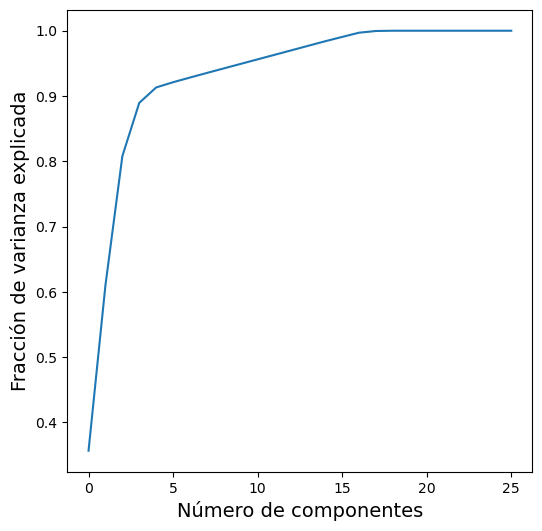

In [94]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_), ax = ax)
ax.set_xlabel('Número de componentes', fontsize = 14)
ax.set_ylabel('Fracción de varianza explicada', fontsize = 14)
plt.show()

Podemos apreciar que una vez se alcanzan las 15 componentes, la fracción de varianza explicada se vuelve casi constante, indicando que con dicha cantidad de componentes es posile crear un conjunto de datos que al momento de ser utilizado, rinda similar al original.

In [48]:
# modelo con las componentes suficientes
pca_v2 = PCA(n_components = 15)
pca_v2.fit(dataframe_2_v2)
pca_scaled_data = pca_v2.transform(dataframe_2_v2)

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


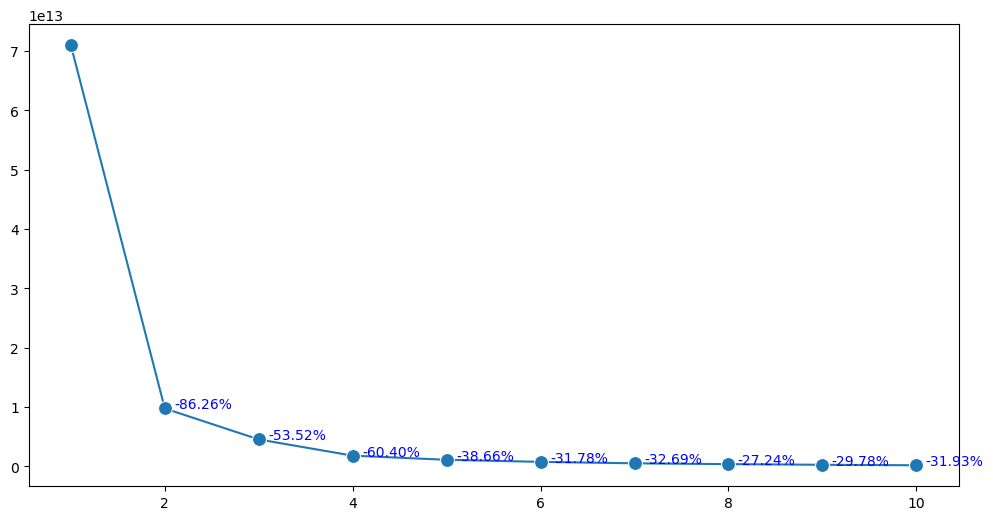

In [49]:
max_clusters = 10 # maximo de clusters y su escala de aumento
inertia, n_clusters = [], [] # listas que almacenara la inercia


for n in range(1, max_clusters + 1):
    KM_model = KMeans(n_clusters = n)
    KM_clusters = KM_model.fit(pca_scaled_data) # ajuste del modelo
    inertia.append(KM_clusters.inertia_) # inercia del modelo
    n_clusters.append(n) # número de clusters

# gráfico comparando número de clusters e inercia
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.lineplot(x = n_clusters, y = inertia, marker = 'o', markersize = 10, ax = ax)

for i in range(1, len(inertia)):
    delta = (inertia[i] - inertia[i - 1]) / inertia[i - 1] * 100
    ax.text(i + 1.1, inertia[i], '%.2f'%delta + '%', color = 'b')
plt.show()

A partir del conjunto de datos con dimensionalidad reducida creamos una serie de modelos de clusterización para encontrar la cantidad de clusters optima a través del método del codo. Como podemos apreciar, el mayor decenso en la inercia se produce entre los 2 a 4 clusters.

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


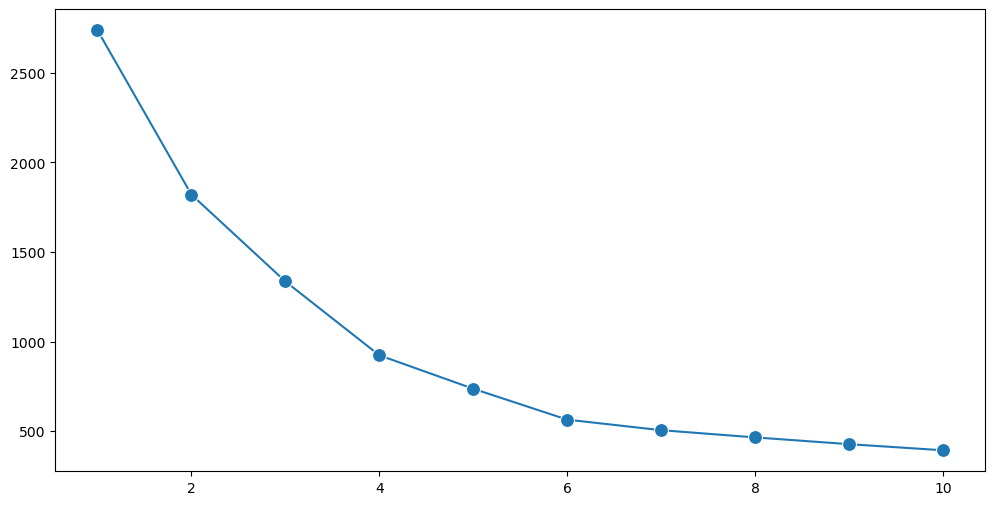

In [50]:
max_clusters = 10 # maximo de clusters y su escala de aumento
inertia, n_clusters = [], [] # listas que almacenara la inercia


for n in range(1, max_clusters + 1):
    KM_model = KMeans(n_clusters = n)
    KM_clusters = KM_model.fit(scaled_data) # ajuste del modelo
    inertia.append(KM_clusters.inertia_) # inercia del modelo
    n_clusters.append(n) # número de clusters

# gráfico comparando número de clusters e inercia
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.lineplot(x = n_clusters, y = inertia, marker = 'o', markersize = 10, ax = ax)

plt.show()

Ahora realizamos el mismo analisis en la cantidad de clusters pero esta vez a partir de modelos creados en base a los datos cuya dimension no ha sido reducida. Obtenemos que entre los 3 a 5 
clusters se produce la mayor redución en la inercia.

In [106]:
n = 3

# ajuste del modelo
KM_model_f = KMeans(n_clusters = n)
np.random.seed(180)

KM_clusters_f = KM_model_f.fit(pca_scaled_data)

df_v2_cls_1  = dataframe_2_v2.copy()
df_v2_cls_1['clusters'] = KM_clusters_f.labels_
df_v2_cls_1_resumen =  df_v2_cls_1[['PROMEDIO', 'APROBADOS', 'REPROBADOS', '%APROBADOS', '%REPROBADOS', 'Ingresos totales', 'ASISTENCIA', 'clusters']].groupby('clusters').mean()
df_v2_cls_1_resumen

,PROMEDIO,APROBADOS,REPROBADOS,%APROBADOS,%REPROBADOS,Ingresos totales,ASISTENCIA
clusters,,,,,,,
0,6.236842,334844.0,6196.0,98.183204,1.816796,1.204524e+06,85.947368
1,5.561579,46745.3,1112.1,97.653812,2.346188,7.545786e+05,89.978947
2,5.885263,16164.0,308.2,98.161946,1.838054,1.019559e+06,89.010526


Debido la diferencia en la cantidad de clusters optimas entre un modelo que cuenta con dimensionalidad reducida y otro que no, decidimos escoger un punto medio entre ambos valores optimos, quedandonos finalmente con 3 clusters.

Podemos apreciar que al realizar la división, la mayores difeencia entre los clusters se encuentra en

In [74]:
dataframe_2_v2_1 = dataframe_2_v2.drop(['APRUEBA', 'REPRUEBA', 'ASISTENCIA', 'PROMEDIO'], axis=1)

In [75]:
train,test = train_test_split(dataframe_2_v2_1, test_size=0.3, random_state=40)
train.head()

,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales,REGION_1,REGION_2,REGION_3,REGION_4,...,REGION_7,REGION_8,REGION_9,REGION_10,REGION_11,REGION_12,REGION_13,REGION_14,REGION_15,REGION_16
291,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
140,80456.0,1210.0,1.481645,98.518355,372442,7.840802e+05,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
298,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
299,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
212,8059.0,84.0,1.031561,98.968439,47118,1.126894e+06,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
dataframe_2_v2_1 = dataframe_2_v2.drop('APROBADOS',axis = 1)

In [77]:
y_train = np.array(train.APROBADOS)
y_test = np.array(test.APROBADOS)

In [78]:
train = train.loc[:, train.columns != 'APROBADOS']
test = test.loc[:, test.columns != 'APROBADOS']

In [79]:
X_train = train.to_numpy().reshape(-1, len(train.columns))
X_test = test.to_numpy().reshape(-1, len(test.columns))

In [80]:
column_transformer_1 = ColumnTransformer([('scaler', StandardScaler(), [col for col in train \
if col not in cols_categoricas])],  remainder = 'passthrough')
column_transformer_1.fit(train)
X_train = column_transformer_1.transform(train)
X_test = column_transformer_1.transform(test)

## Regresión lineal

El s

In [81]:
# Regresión Lineal

linreg=LinearRegression()

linreg.fit(X_train, y_train)

y_pred_train=linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
mse_train = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse_train = np.mean(mse_train)

R2_train=cross_val_score(linreg, X_train, y_train, scoring='r2', cv=5)
mean_R2_train = np.mean(R2_train)


mse_test = cross_val_score(linreg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
mean_mse_test = np.mean(mse_test)

R2_test = cross_val_score(linreg, X_test, y_test, scoring='r2', cv=5)
mean_R2_test = np.mean(R2_test)

print(f'''R^2 train: {mean_R2_train}
MSE train: {mean_mse_train}
R^2 test: {mean_R2_test}
MSE test: {mean_mse_test}''')

R^2 train: 1.0
MSE train: -3.1439532019937962e-21
R^2 test: 1.0
MSE test: -7.631144582749556e-21


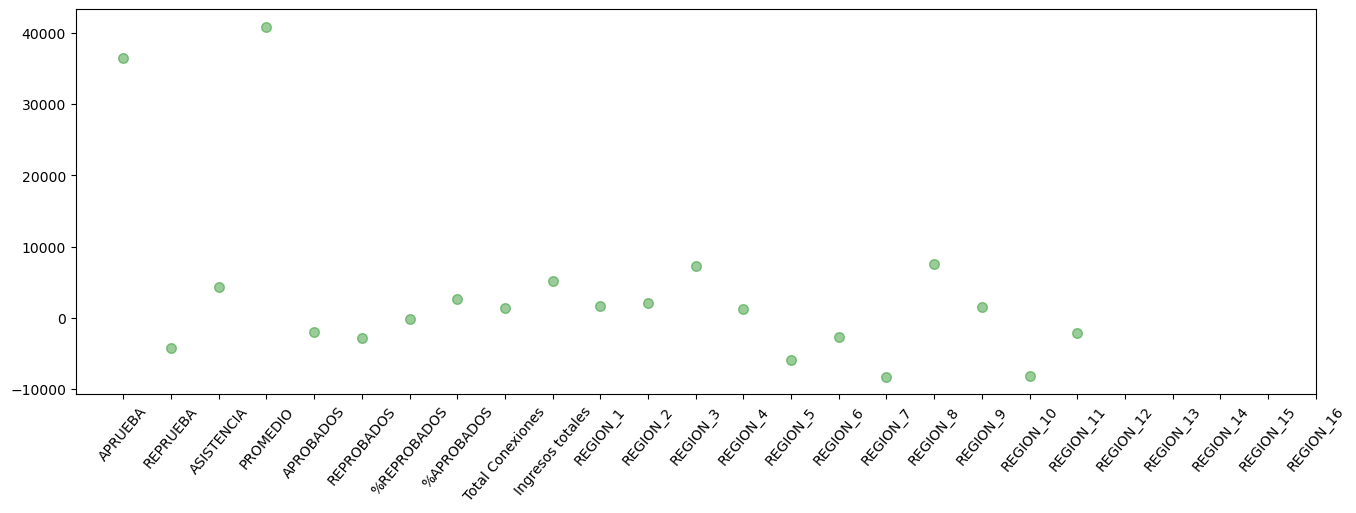

[36503.16166067 -4269.70416826  4269.70416826 40869.33435374
 -1936.60679073 -2777.8938258   -201.7437132   2576.50991519
  1342.52283099  5226.41718574  1594.48862381  2007.91976725
  7339.1877825   1165.78842402 -5925.21277109 -2654.57208662
 -8305.5874056   7563.06891237  1476.56997429 -8243.29059276
 -2184.17302109]


In [84]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
ax.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(dataframe_2_v2.columns)))
ax.set_xticklabels(dataframe_2_v2.columns)
plt.xticks(rotation=50)
plt.show()
print(linreg.coef_)

Alpha: 1.5
R^2 train: 0.9999998616617173
MSE train: 679.9137000447739
R^2 test: 0.9999995822491815
MSE test: 962.1909768173731
________________________

Alpha: 1.7
R^2 train: 0.9999998220487741
MSE train: 873.8462198526624
R^2 test: 0.9999994697365168
MSE test: 1231.6658920851005
________________________

Alpha: 2
R^2 train: 0.9999997566273198
MSE train: 1192.0851401135155
R^2 test: 0.9999992748713925
MSE test: 1704.4997253001106
________________________

Alpha: 2.3
R^2 train: 0.9999996832130451
MSE train: 1542.7991741462433
R^2 test: 0.9999990408855591
MSE test: 2277.3320930162386
________________________

Alpha: 5
R^2 train: 0.9999985586947291
MSE train: 7062.9105054596685
R^2 test: 0.9999954385507058
MSE test: 10380.98871224008
________________________



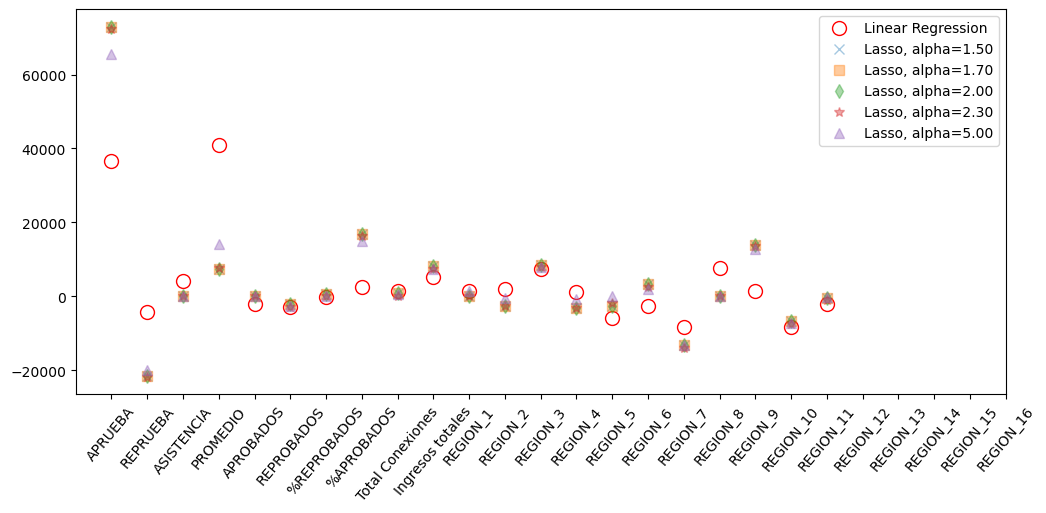

In [86]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(linreg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

mk=['x','s','d','*','^']

for na,al in enumerate([1.5,1.7,2,2.3,5]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(X_train, y_train)
    
    mse_train_ll = cross_val_score(ll, X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    mean_mse_train_ll = np.mean(mse_train_ll)

    R2_train_ll = cross_val_score(ll, X_train, y_train, scoring='r2',cv=5)
    mean_R2_train_ll = np.mean(R2_train_ll)


    mse_test_ll = cross_val_score(ll, X_test, y_test, scoring='neg_mean_squared_error',cv=5)
    mean_mse_test_ll = np.mean(mse_test_ll)

    R2_test_ll = cross_val_score(ll, X_test, y_test, scoring='r2',cv=5)
    mean_R2_test_ll = np.mean(R2_test_ll)

    print(f'''R^2 train: {mean_R2_train_ll}
MSE train: {-mean_mse_train_ll}
R^2 test: {mean_R2_test_ll}
MSE test: {-mean_mse_test_ll}''')

    print('________________________\n')
    
    ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(dataframe_2_v2.columns)))
ax.set_xticklabels(dataframe_2_v2.columns)
plt.xticks(rotation=50)
ax.legend()
plt.show()

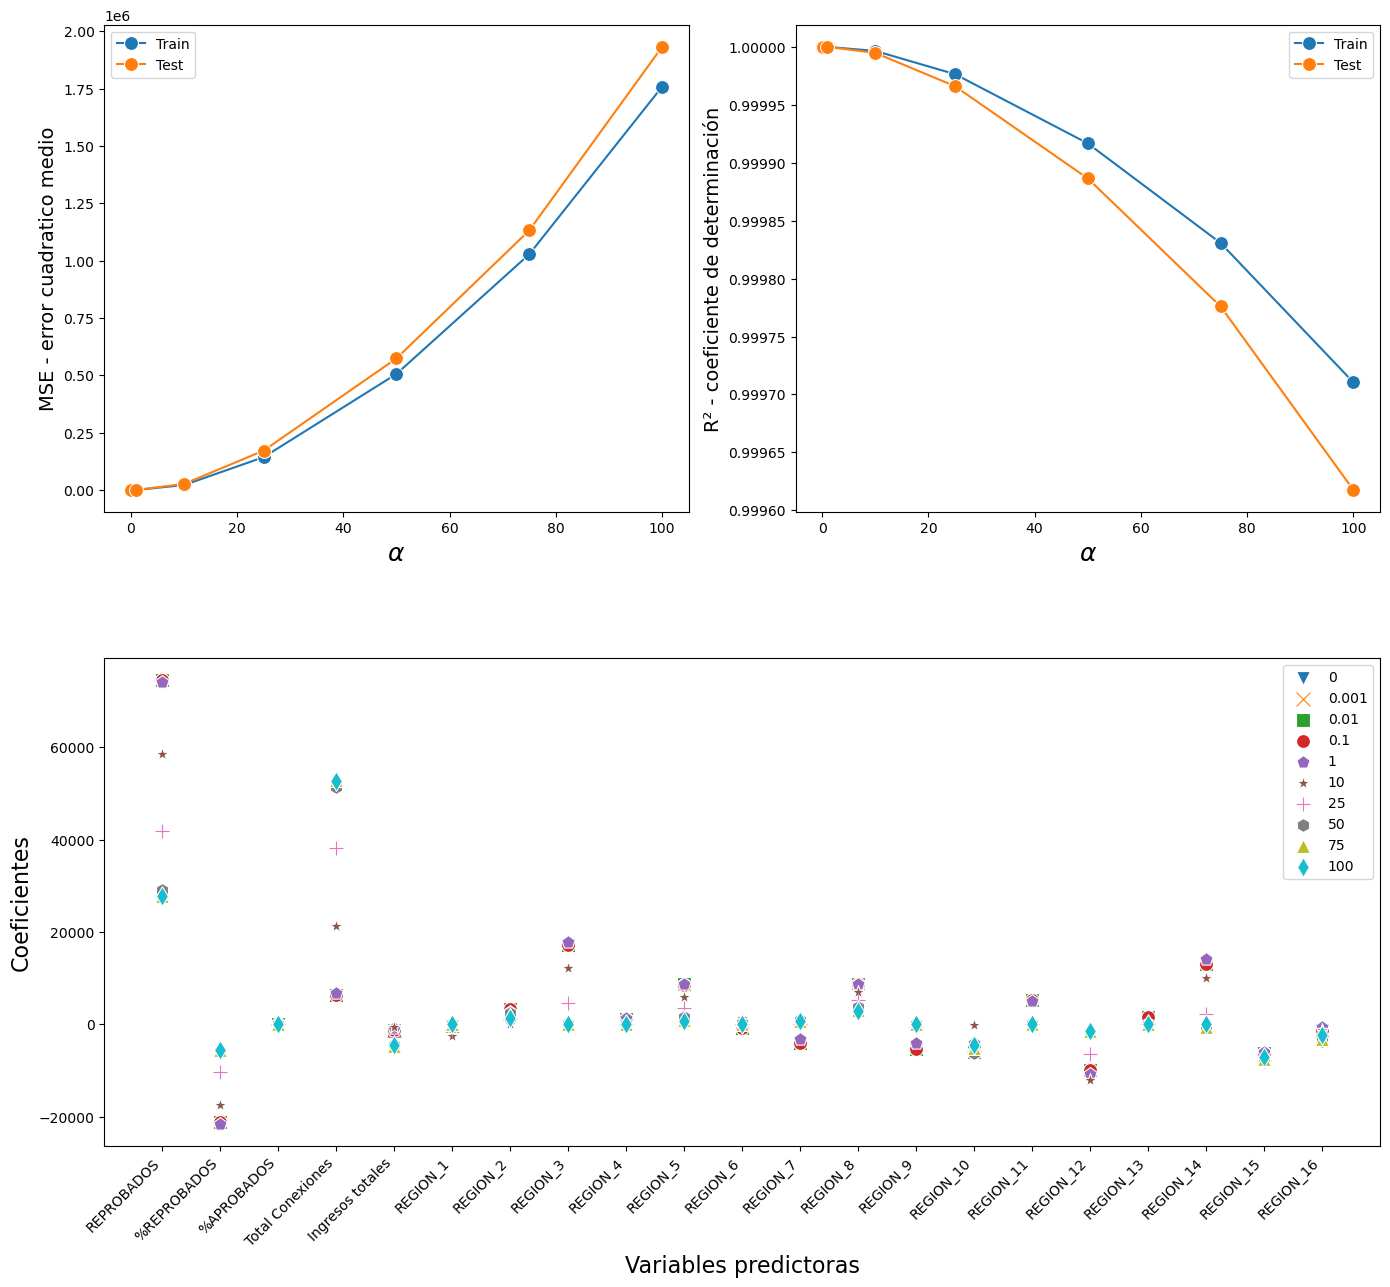

In [93]:
# párametro "alpha" de Lasso
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100]

markers = ['v', 'x', 's', 'o', 'p', '*', '+', 'h', '^', 'd']

# listas que almacenaran los errores por iteración
MSE_trainL, R2_trainL = [], []
MSE_testL, R2_testL = [], []
i = 0

fig = plt.figure(figsize = (14, 18))
ax1 = plt.subplot2grid(shape = (3, 2), loc = (0, 0), colspan = 1)
ax2 = plt.subplot2grid(shape = (3, 2), loc = (0, 1), colspan = 1)
ax3 = plt.subplot2grid(shape = (3, 2), loc = (1, 0), colspan = 2)


for alpha in alphas:
    
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    
    Y_predict_trainL = lasso.predict(X_train) # predicciones para datos de entrenamiento
    mse_trainL = mean_squared_error(y_train, Y_predict_trainL) # MSE
    r2_trainL = r2_score(y_train, Y_predict_trainL) # R2
    
    Y_predict_testL = lasso.predict(X_test) # predicciones para datos de prueba
    mse_testL = mean_squared_error(y_test, Y_predict_testL) # MSE
    r2_testL = r2_score(y_test, Y_predict_testL) # R2
    
    MSE_trainL.append(mse_trainL)
    MSE_testL.append(mse_testL)
    R2_trainL.append(r2_trainL)
    R2_testL.append(r2_testL)
    
    # gráfico de coeficientes
    sns.scatterplot(x = train.columns, y = lasso.coef_, ax = ax3, marker = markers[i], s = 100, label = f'{alpha}')
    
    i += 1

# gráfico de metricas de error para los datos de entrenamiento
sns.lineplot(x = alphas, y = MSE_trainL, ax = ax1, marker = 'o', markersize = 10, label = 'Train')
sns.lineplot(x = alphas, y = MSE_testL, ax = ax1, marker = 'o', markersize = 10, label = 'Test')

# gráfico de metricas de error para los datos de prueba
sns.lineplot(x = alphas, y = R2_trainL, ax = ax2, marker = 'o', markersize = 10, label = 'Train')
sns.lineplot(x = alphas, y = R2_testL, ax = ax2, marker = 'o', markersize = 10, label = 'Test')


# rotulación y cambio de formato
ax1.set_xlabel(r'$\alpha$', fontsize = 18)
ax1.set_ylabel('MSE - error cuadratico medio', fontsize = 14)

ax2.set_xlabel(r'$\alpha$', fontsize = 18)
ax2.set_ylabel('R\u00b2 - coeficiente de determinación', fontsize = 14)

ax3.set_xlabel('Variables predictoras', fontsize = 16)
ax3.set_ylabel('Coeficientes', fontsize = 16)
ax3.set_xticklabels(train.columns, rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

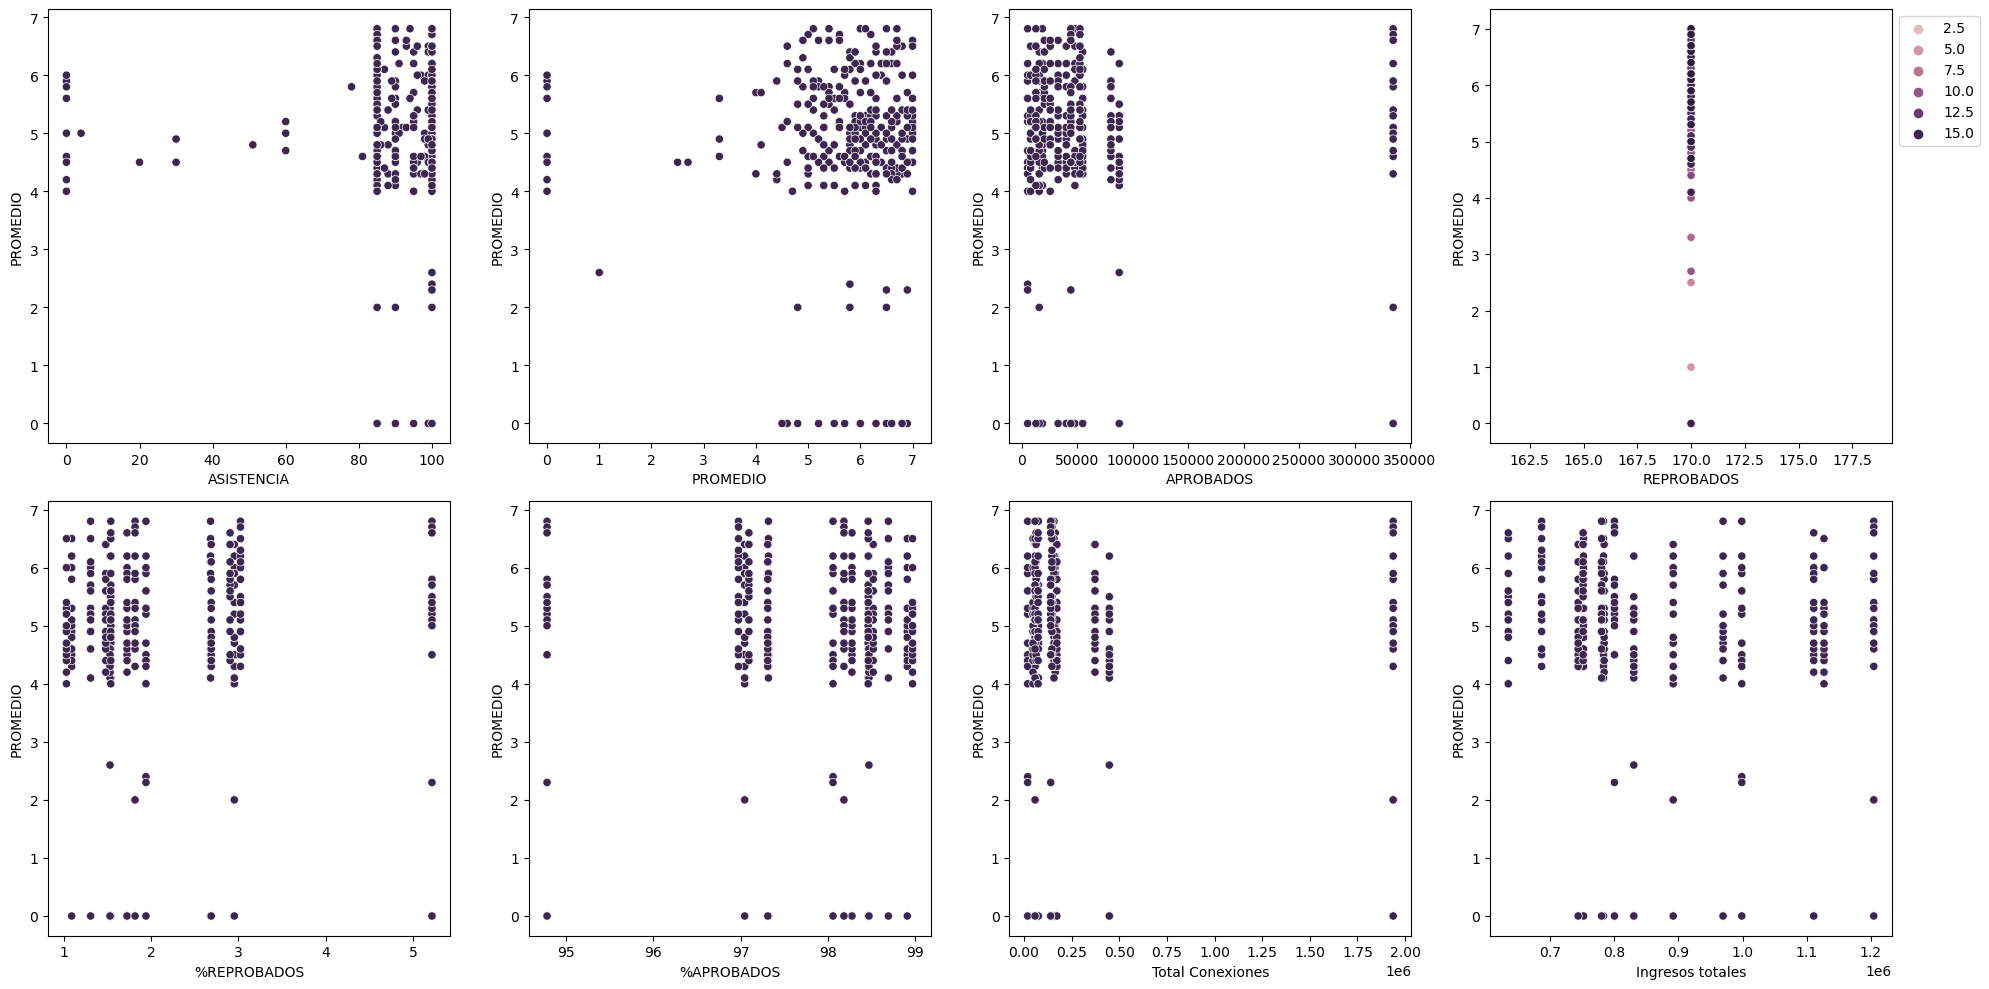

In [67]:
cols = [col for col in dataframe_2_sample.columns if col not in ('REGION', 'APRUEBA', 'REPRUEBA')]

# creación de ejes y figura
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
i = 1


for ax, col in zip(axes.flat, cols):
    if i == 4:
        sns.scatterplot(x = dataframe_2[col], y = dataframe_2_sample['PROMEDIO'] , hue = dataframe_2_sample['REGION'], ax = ax)
        ax.legend(loc = 'upper left', bbox_to_anchor = [1, 1])
    else:
        sns.scatterplot(x = dataframe_2_sample[col], y = dataframe_2['PROMEDIO'] , hue = dataframe_2['REGION'], ax = ax, legend = False)
    i += 1

plt.tight_layout()
plt.show()

C:\Users\marce\anaconda3\envs\ambiente_geopandas\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


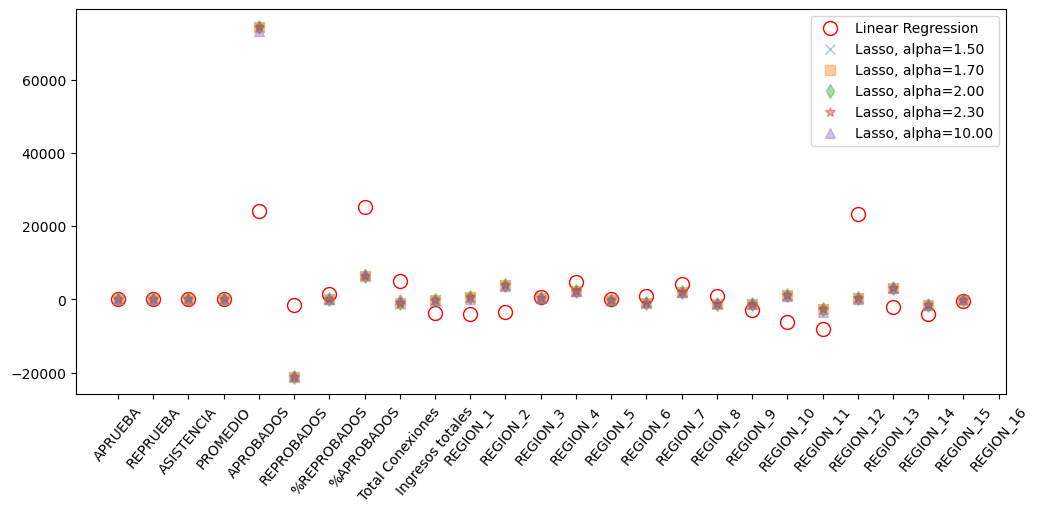

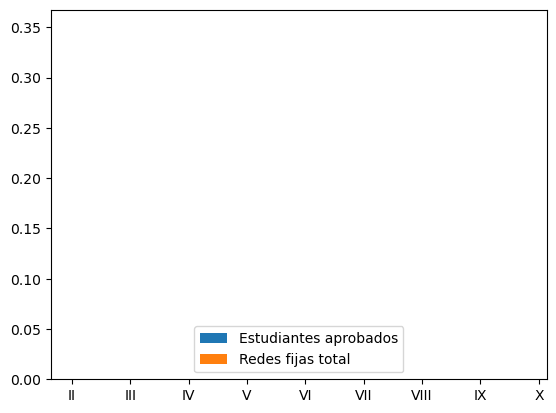

In [ ]:
fig_2, ax = plt.subplots()
aprobados = ax.bar(dataframe_2_sample['APROBADOS'].unique(), 0.35, label = 'Estudiantes aprobados')
redes = ax.bar(dataframe_2_sample['Total Conexiones'].unique(), 0.35, label = 'Redes fijas total')
ax.set_ylabel('')
ax.set_title('')
ax.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'RM', 'XIV', 'XV', 'XVI'])
ax.legend()
plt.show()